#이번주에 학습한 내용:

##-알고리즘 매매 (Algorithmic Trading) 이란 무엇인가?

1.   매매 전략을 만든다 (SMA 5 20 60 120 선이 역배열을 이후다가 5 선이 20을 골든크로스할때)
2.   파이썬으로 전략을 구현한다. ( 코드 참고 )
3. 백테스팅을 통해 매매 전략이 사용 가능한지 확인한다.
 



In [1]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=f4e5a6d5f05d033109350c9b4bcc1798727e512ffd697df0d55627a92eec1f6d
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas_ta


In [2]:
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.0 MB/s eta 0:00:00


In [3]:
pip install --upgrade ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=77ed8bac6d2189bb9231fa1156a4456528e2e9c42b7c279f2c5754391e01465f
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [4]:
import yfinance as yf
import numpy as np
import ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import pandas_ta as pta
import pandas as pd

##나의 알고지금 매매 전략 : **RSI,MACD,Stochastic,VWAP Signal을 사용해 1시간봉으로 매매를 진행한다.**

만약 주가가 박스권을 형성하고 있다면:


*   매수 시그널: MACD > 0, 3개 전 봉의 평균 종가 > VWAP, Stochastic(K,D) < 30  
*   매도 시그널: MACD < 0, 3개 전 봉의 평균 종가 < VWAP, Stochastic(K,D) > 70  


만약 주가가 상승 or 하락 추세를 보이고 있다면:


*   매수 시그널: MACD > 0, 3개 전 봉의 평균 종가 > VWAP, RSI < 30  
*   매도 시그널: MACD < 0, 3개 전 봉의 평균 종가 < VWAP, RSI > 70  


###Q: 주가가 박스권을 형성하는지 아닌지 어떻게 구현할 수 있을까? 

###Answer 1 : RSI의 기간을 60으로 잡고, RSI가 10번 연속 45~55를 형성하고 있을때 박스권이라고 볼 수 있다.

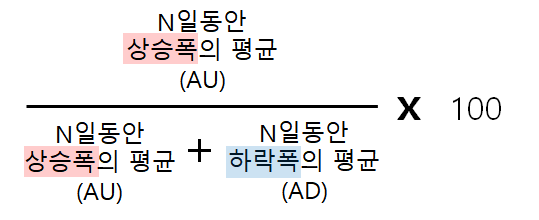


###Answer 2 : ADX 지표를 이용해서 0과 가까울수록 박스권을 유지한다고 볼 수 있다.

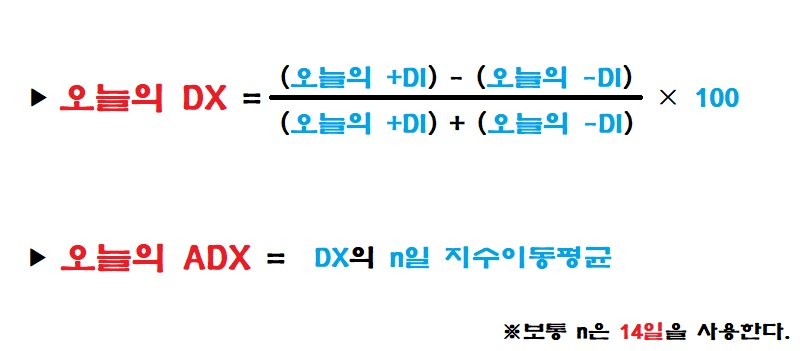

#1. RSI

RSI, 즉 상대강도지수는 이름에서 나와있다시피 현재 가격의 상승 압력과 하락 압력 간의 상대적인 강도를 나타내는 지표다. 그 강도를 백분율로 계산해서 현재 가격의 상태를 평가한다. 

RSI는 과매수와 과매도 상태를 판단하기 쉽다. 일정 기간동안 가격의 전일 대비 상승분 또는 하락 분의 평균을 구해서 상승분이 더 크면 RSI가 상승하고, 그게 아니면 하락한다. RSI가 50이라면 매수세와 매도세가 비슷하다는 뜻으로 받아들일 수 있다.

RSI가 70% 이상이면 초과매수 국면, 30% 이하이면 초과 매도 국면으로 규정했다. 

RSI의 한계도 존재한다. RSI는 일정 기간 동안의 상승 or 하락 폭을 가지고 추세를 판단하는 지표이기 때문에 박스권에 갇힌 주식들은 False Signal이 나올 확률이 크다.

따라서 MACD 등과 같은 지표와 병행해야 예측의 정확도를 높일 수 있다.

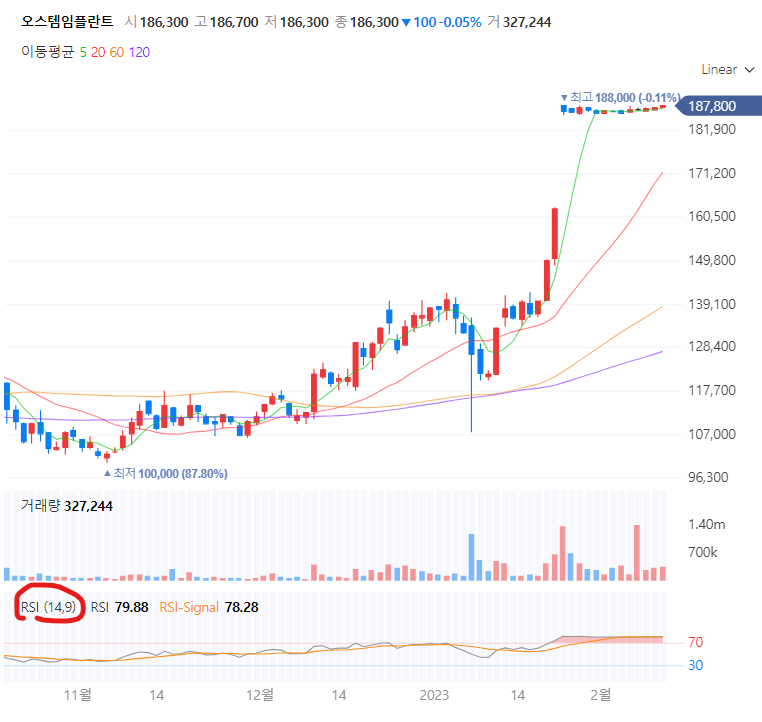

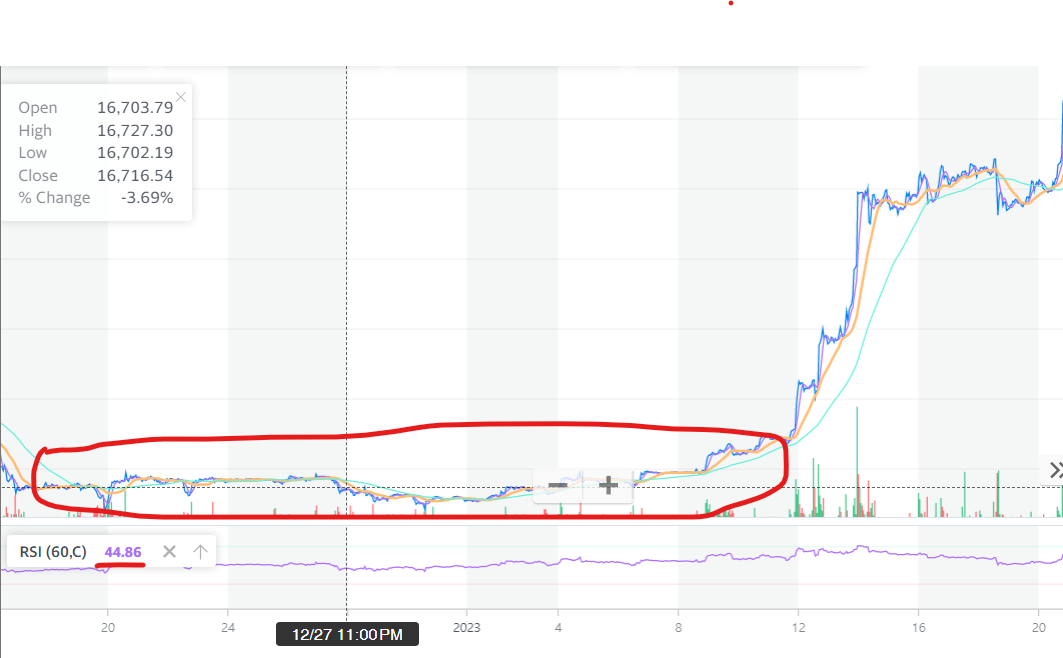

#2. Stochastic 

스토캐스틱은 최고가와 최저가 사이의 범위 안에서 현재 가격이 어느 위치에 형성되어 있는지 알려주는 지표다.

일정한 기간 동안의 가격 변동폭과 현재의 가격과의 관계를 백분율로 표현해 만든 모멘텀 지표다. RSI와 마찬가지로 100%에 가까울수록 과매수 상태, 0%에 가까울수록 과매도다. 

스토캐스틱은 상승이나 하락과 같은 특정한 추세를 보이는 박스권 구간에서 가장 큰 효과를 발휘한다.

스토캐스틱은 계산이 다소 복잡하긴 하지만 Ta library를 이용하면 쉽게 구현할 수 있다.

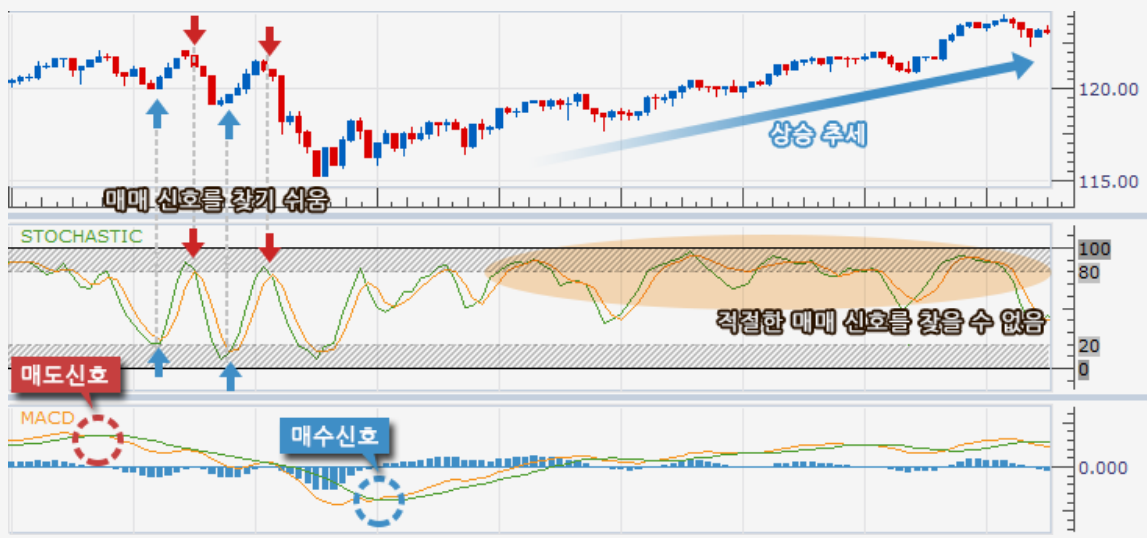

#3. MACD 

현재 시세를 예측하는데 있어 5년 전의 데이터와 어제의 데이터 중 무엇이 더 중요할까? 당연히 최근 데이터가 더 중요하다. 이와 같은 개념을 일반적인 이평선에 적용한 것이 바로 MACD라고 할 수 있다.

MACD 곡선은 단기 이동평균선(12) - 장기 이동평균선(26)으로 계산되며, 

Signal 곡선은 n일(9) 동안의 MACD 이동평균 값이다. 

MACD가 Signal을 상향돌파할때 매수하며, 하향돌파할때 매도하는게 기본적인 트레이딩 방식이다.



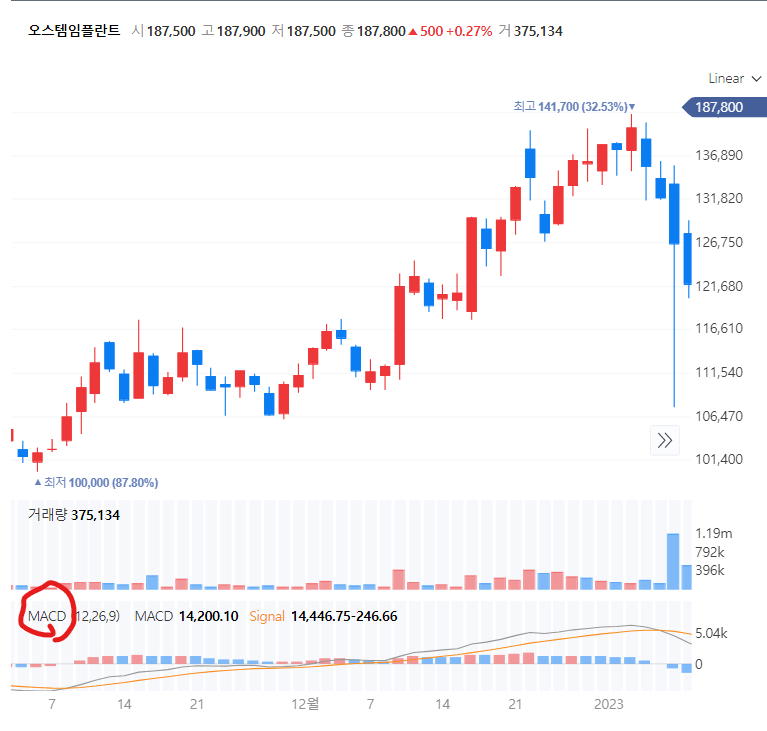

#4 VWAP


VWAP(Volume Weighted Average Price)는 가격을 평균화할 때 거래량을 고려하는 이동 평균 파생 지표 중 하나이다. VWAP는 볼륨 가중 평균 가격의 약자이며, 간단히 말해서 거래량 가중 평균 가격은 거래량에 대한 누적 평균 가격이라고 볼 수 있다.

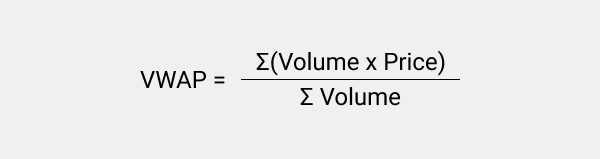





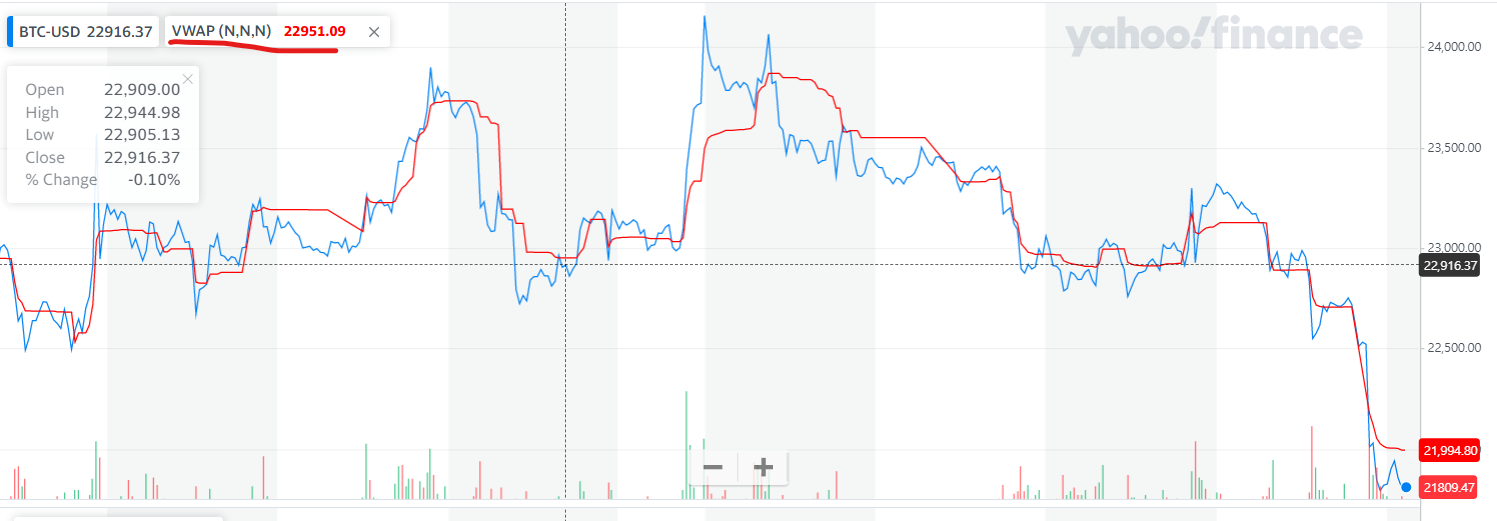

In [5]:
df = yf.download('BTC-USD',start='2022-11-01',interval='1h')

#Stochastic 지표 
'''참고로 df['High'] 과 df.High 는 똑같다'''
df['%K'] = ta.momentum.stoch(df.High,df.Low,df.Close,window=14,smooth_window=3)
df['%D'] = df['%K'].rolling(3).mean()

#RSI 지표 
df['rsi'] = ta.momentum.rsi(df.Close,window=14)

#RSI 60 지표  -> 이때 RSI가 40 ~ 60 사이에 24번 or 48번(하루 or 이틀) 이상 지속되면 Stochastic 넣기!
df['rsi60'] = ta.momentum.rsi(df.Close,window=60)

#MACD 지표
df['macd'] = ta.trend.macd_diff(df.Close)

#VWAP 지표
df['VWAP'] = pta.vwap(df.High, df.Low, df.Close, df.Volume)

df.dropna(inplace=True)

VWAPsignal = [0]*len(df)
backcandles = 2

for row in range(backcandles, len(df)):
  list_dnt = []
  list_upt = []
  upt = 1
  dnt = 1
  for i in range(row-backcandles, row+1):
      if df.High[i]>=df.VWAP[i]: #전날의 종가가 VWAP signal 보다 높으면 dnt = 0 대입
        list_dnt.append(0)
        dnt=0
      elif df.High[i]<df.VWAP[i]:
        list_dnt.append(1)
      if df.Low[i]<=df.VWAP[i]:
        list_upt.append(0)
        upt=0
      elif df.Low[i]>df.VWAP[i]:
        list_upt.append(1)
  
  if 0 in list_upt:
    upt = 0
  if 0 in list_dnt:
    dnt = 0
        
  if upt==1 and dnt==1:
        #print("!!!!! check trend loop !!!!")
      VWAPsignal[row]=3
  elif upt==1:
      VWAPsignal[row]=2
  elif dnt==1:
      VWAPsignal[row]=1

df['VWAPSignal'] = VWAPsignal

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


##Stochastic 지표

In [6]:
StochasticSignal = [0]*len(df)
backcandles = 10

for row in range(backcandles, len(df)):
  list_dnt = []
  dnt = 1
  for i in range(row-backcandles, row+1):
      if 45<=df.rsi60[i]<=50:
        list_dnt.append(1)
        dnt=1
      else:
        list_dnt.append(0)
        dnt=0
        
  if 0 in list_dnt:
    dnt = 0
        
  if dnt==1:
    StochasticSignal[row]=2 #시그널
  elif dnt==0:
    StochasticSignal[row]=1 

df['StochasticSignal'] = StochasticSignal

In [184]:
#매수 시그널과 매도 시그널을 계산해주기 위해 for문을 돌린다!

''' 만약 매수를 진행했으면 매도 시그널이 있을때까지는 매수를 멈춘다(계속 0 대입). 
    만약 매수를 진행하지 않았으면 매수 시그널(buy=1)이 있을때까지 매도를 멈춘다(계속 0 대입) '''

buy = 0
buy_list = []
sell_list = []
for i in range(len(df)):
  if buy == 0:
    if df.StochasticSignal[i] == 2:
      buy =  (df['%K'].between(0,40)[i]) & (df['%D'].between(0,40)[i]) & (df.macd[i]> 0 ) & (df.VWAPSignal[i] == 2)
    elif df.StochasticSignal[i] == 1:
      buy =  (df.rsi[i]>30) & (df.macd[i]> 0 ) & (df.VWAPSignal[i] == 2)
    buy_list.append(buy)
    sell_list.append(0)
  elif buy == 1:
    #매도 시그널을 찾아야한다. 매수 시그널은 계속 0을 넣어준다,
    if df.StochasticSignal[i] == 2:
      sell = (df['%K'].between(70,100)[i]) & (df['%D'].between(70,100)[i])  & (df.macd[i]< 0 )  & (df.VWAPSignal[i] == 1) 
    elif df.StochasticSignal[i] == 1:
      sell = (df.rsi[i]<60) & (df.macd[i]< 0 )  & (df.VWAPSignal[i] == 1)
    sell_list.append(sell)
    buy_list.append(0)
    if sell == 1:
      buy = 0


df['Buy'] = np.array(buy_list)
df['Sell'] = np.array(sell_list)

In [185]:
Buying_dates, Selling_dates = [],[]

for i in range(len(df) - 1):
  if df.Buy.iloc[i]: # if contains a buy signal
    # Buy at the next time, because otherwise I would have a forward looking bias
    Buying_dates.append(df.iloc[i+1].name)
    for num,j in enumerate(df.Sell[i:]):
      if j:
        Selling_dates.append(df.iloc[i + num + 1].name)
        break
     
    

In [186]:
#불필요한 포지션 삭제하기 ( 매도 없이 매수만 진행한 포지션 )
cutit = len(Buying_dates) - len(Selling_dates)

In [187]:
cutit

1

In [188]:
if cutit:
  Buying_dates = Buying_dates[:-cutit]
  print(Buying_dates)
frame = pd.DataFrame({'Buying_dates': Buying_dates, 'Selling_dates': Selling_dates})

frame

[Timestamp('2022-11-04 05:00:00+0000', tz='UTC'), Timestamp('2022-11-10 06:00:00+0000', tz='UTC'), Timestamp('2022-11-14 10:00:00+0000', tz='UTC'), Timestamp('2022-11-15 18:00:00+0000', tz='UTC'), Timestamp('2022-11-22 17:00:00+0000', tz='UTC'), Timestamp('2022-11-27 23:00:00+0000', tz='UTC'), Timestamp('2022-11-29 08:00:00+0000', tz='UTC'), Timestamp('2022-11-30 04:00:00+0000', tz='UTC'), Timestamp('2022-12-02 11:00:00+0000', tz='UTC'), Timestamp('2022-12-04 22:00:00+0000', tz='UTC'), Timestamp('2022-12-08 18:00:00+0000', tz='UTC'), Timestamp('2022-12-12 16:00:00+0000', tz='UTC'), Timestamp('2022-12-17 10:00:00+0000', tz='UTC'), Timestamp('2022-12-20 06:00:00+0000', tz='UTC'), Timestamp('2022-12-23 01:00:00+0000', tz='UTC'), Timestamp('2022-12-24 21:00:00+0000', tz='UTC'), Timestamp('2022-12-28 13:00:00+0000', tz='UTC'), Timestamp('2022-12-29 07:00:00+0000', tz='UTC'), Timestamp('2022-12-30 19:00:00+0000', tz='UTC'), Timestamp('2023-01-04 07:00:00+0000', tz='UTC'), Timestamp('2023-01-

,Buying_dates,Selling_dates
0,2022-11-04 05:00:00+00:00,2022-11-05 20:00:00+00:00
1,2022-11-10 06:00:00+00:00,2022-11-11 22:00:00+00:00
2,2022-11-14 10:00:00+00:00,2022-11-14 23:00:00+00:00
3,2022-11-15 18:00:00+00:00,2022-11-16 16:00:00+00:00
4,2022-11-22 17:00:00+00:00,2022-11-23 17:00:00+00:00
5,2022-11-27 23:00:00+00:00,2022-11-28 05:00:00+00:00
6,2022-11-29 08:00:00+00:00,2022-11-29 18:00:00+00:00
7,2022-11-30 04:00:00+00:00,2022-12-01 19:00:00+00:00
8,2022-12-02 11:00:00+00:00,2022-12-03 07:00:00+00:00
9,2022-12-04 22:00:00+00:00,2022-12-05 16:00:00+00:00


In [189]:
def profitcalc():
  Buyprices = df.loc[frame.Buying_dates].Open
  Sellprices = df.loc[frame.Selling_dates].Open
  return (Sellprices.values - Buyprices.values) / Buyprices.values

def drawdown(d_rets):
  cumulative = (1+ d_rets).cumprod()
  #전 고점 = HWM
  highwatermark = cumulative.cummax()
  drawdown = (cumulative / highwatermark) - 1
  return drawdown

def maximum_drawdown(d_rets):
  return str(round(np.min(drawdown(d_rets)) * 100, 3)) + '%'
  

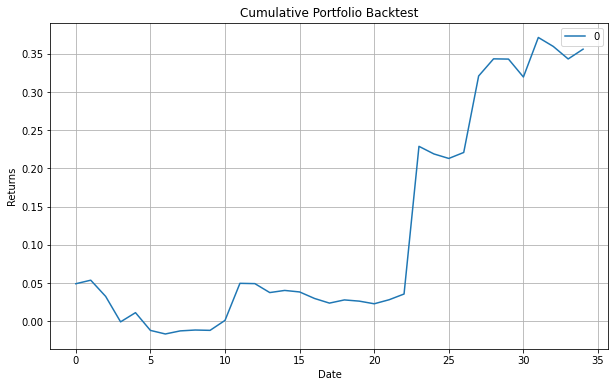

In [190]:
profits = profitcalc()


data = pd.DataFrame(profits)

maximum_drawdown(data)

#만약 MDD를 그래프에 시각화하고 싶다면?
'''
MDD 를 그래프에 표시:
'''
port_cum_rets = (1 + data).cumprod() - 1

def get_mdd(d_rets):
    arr_v = np.array(port_cum_rets)
    peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
    print(port_cum_rets)
    peak_upper = np.argmax(arr_v[:peak_lower])
    mdd = round(port_cum_rets[peak_upper]*100,4) - round(port_cum_rets[peak_lower]*100,4)
    print(mdd)
    return peak_upper, peak_lower

port_cum_rets.plot(figsize=(10,6),grid=True,label='Portfolio')
plt.title('Cumulative Portfolio Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

In [193]:
maximum_drawdown(data)


'0   -6.676\ndtype: float64%'

총 수익률: 35.60000000000001 %
MDD: -6.676%
Buy & Hold: 7.4699%
성공률: 60.0%


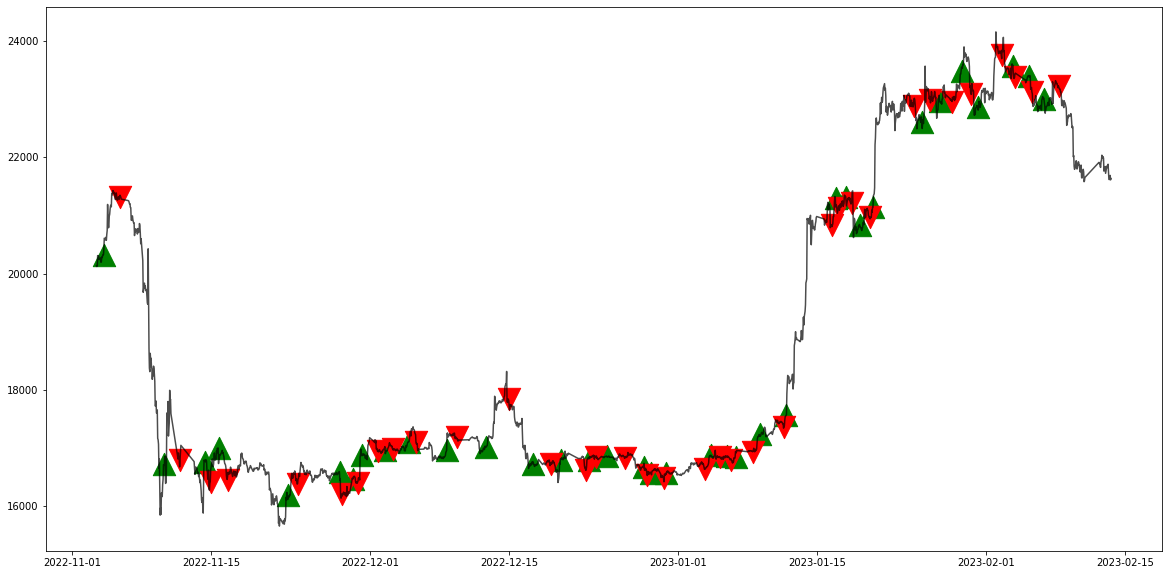

In [194]:
import matplotlib.pyplot as plt
print('총 수익률: ' + str((round((profits+1).prod(),4) -1) * 100) + ' %')
print('MDD: ' + str(-6.676) + '%')
print('Buy & Hold: ' + str(round(((df.Close[-1] - df.Close[0]) / df.Close[0])*100,4)) + '%')
print('성공률: 60.0%')
plt.figure(figsize=(20,10))
plt.plot(df.Close,color='k',alpha=0.7)
plt.scatter(frame.Buying_dates,df.Open[frame.Buying_dates],marker='^',color='g',s=500)
plt.scatter(frame.Selling_dates,df.Open[frame.Selling_dates],marker='v',color='r',s=500)